# Embedded ML - Lab 1.1: Artificial Neural Networks in Python

In this lab you are asked to write the code for an Artificial Neural Network (ANN) without using ML libraries such as SciKit-learn or TensorFlow, but you are allowed to use standard libraries such as math, numpy and matplotlib if needed. You are given some helper functions but you are expected to write most of the code and be able to explain and modify everything. This is a key foundational exercise for you to understand the efficiency aspects that will be dealt with throughout this course.

### Learning outcomes


* Explain the basic concepts of ANNs
* Implement simple ANNs in Python without using advanced libraries
* Analyze the computational resources demanded when training, running inference and scaling ANNs



### Linear regression
Linear regression is perhaps the simplest form of ML and can be thought of as an ANN with a single neuron. Yet, it can make a linear approximation of an input-output pair of data arrays.

Implement a Python class for a linear regressor that has at least three methods to intitialize, predict an output and compute the error. Write then a simple code that instantiates the class to make a linear aproximation of two small given datasets and report the errors obtained.

----------------- Model for dataset A ----------------
iteracion: 0
Expected Y values are:	[-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
Predicted Y values are:	[2, -3, -8, -13, -18, -23, -28, -33, -38, -43]
The error metric is	: 105.19030373565806
iteracion: 1
Expected Y values are:	[-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
Predicted Y values are:	[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
The error metric is	: 24.08318915758459
iteracion: 2
Expected Y values are:	[-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
Predicted Y values are:	[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
The error metric is	: 14.317821063276353



----------------- Model for dataset B ----------------
iteracion: 0
Expected Y values are:	[-2.64, -3, -2.9, -2.64, -2, -1.09, 0.24, 2.01, 3.76, 7.89]
Predicted Y values are:	[-2.16, -0.6000000000000001, 0.23199999999999998, 0.96, 2.0, 2.988, 4.08, 5.224, 6.16, 7.98]
The error metric is	: 9.603822364038185
iteracion: 1
Expected Y values are:	[-2.64, -3, -2.9, -2.64, -2, -1.09, 0.24, 2.01, 3.76, 7.89]
Predicted Y value

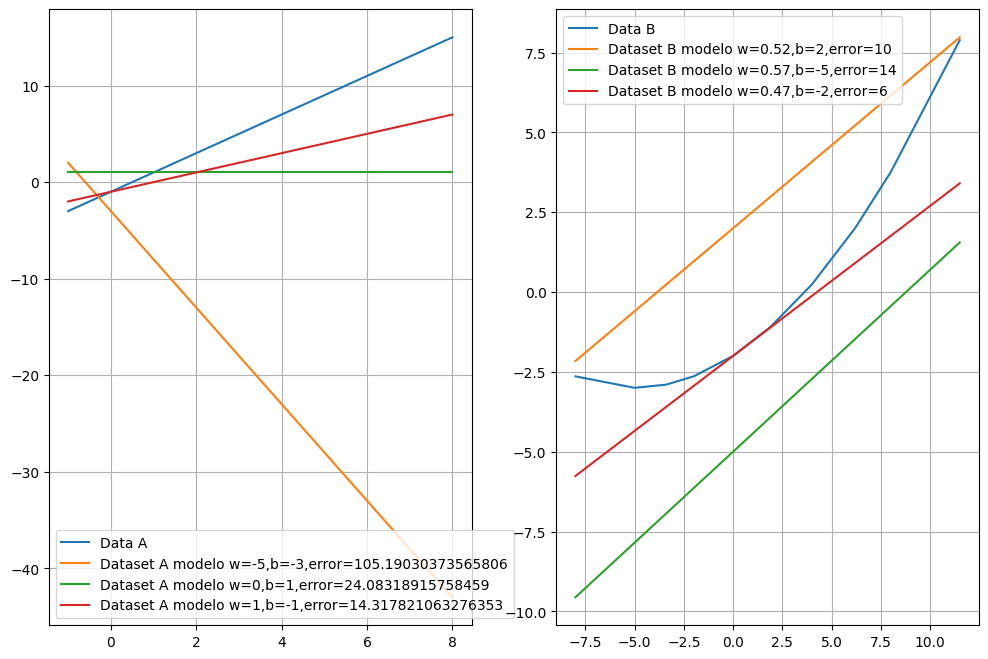

In [ ]:
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8), dpi=100)

class LinRegressor:
  def __init__(self, w, b):
    self.w = w
    self.b = b

  def predict(self, x):
    self.myY = []

    # predict all the corresponding Y values from X, using a linear model
    # code...
    for i in range(len(x)):
      self.myY.append(x[i]*self.w+self.b)

    return self.myY

  def error(self, y):
    total_square_error = 0

    # compute the total error using the same metric seen in the lecture
    # code...
    for i in range(len(y)):
      total_square_error += (y[i]-self.myY[i])**2

    return total_square_error**(1/2)

datasets = {"A": {
    "input": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
    "output": [-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
    },
    "B": {
    "input": [-8, -5, -3.4, -2, 0, 1.9, 4, 6.2, 8, 11.5],
    "output": [-2.64, -3, -2.9, -2.64, -2, -1.09, 0.24, 2.01, 3.76, 7.89]
    }
}

# assign proper dataset arrays to x and y
# code...
print("----------------- Model for dataset A ----------------")
x = datasets["A"].get("input")
y = datasets["A"].get("output")
modelos_A = []
plt.subplot(1,2,1)
plt.plot(x,y, label='Data A')
w_a = [-5,0,1]
b_a = [-3,1,-1]
for models in range(3):
  w = w_a[models]
  b = b_a[models]
  model = LinRegressor(w, b)
  modelos_A.append(model)
  print("iteracion:", models)
  print("Expected Y values are:\t" + str(y))
  print("Predicted Y values are:\t" + str(model.predict(x)))
  print("The error metric is\t: " + str(model.error(y)))
  plt.plot(x,model.predict(x), label='Dataset A modelo w={},b={},error={}'.format(w,b,model.error(y)))

plt.legend()
plt.grid()




print("\n\n\n----------------- Model for dataset B ----------------")
x = datasets["B"].get("input")
y = datasets["B"].get("output")
modelos_B = []
plt.subplot(1,2,2)
plt.plot(x,y, label='Data B')
w_b = [0.52,0.57,0.47]
b_b = [2,-5,-2]
for models in range(3):
  w = w_b[models]
  b = b_b[models]
  model = LinRegressor(w, b)
  modelos_B.append(model)
  print("iteracion:", models)
  print("Expected Y values are:\t" + str(y))
  print("Predicted Y values are:\t" + str(model.predict(x)))
  print("The error metric is\t: " + str(model.error(y)))
  plt.plot(x,model.predict(x), label='Dataset B modelo w={},b={},error={}'.format(round(w,2),round(b,2),round(model.error(y)),2))




plt.legend()
plt.grid()
plt.show()

Measure the error for three different sets of parameter values, for each dataset. Plot the datasets against the predictions and analyze the model results obtained.



*   Can the error of dataset A be zero?
*   Can the error of dataset B be zero?
*   A zero error means that the model represents the system perfectly?
*   Can you model any kind of system with this type of model?



1.  The error for dataset A could be zero since it is observed that the data describe a linear function.

2. The error cannot be zero for dataset B since the data does not describe a linear function, therefore our linear regression model cannot correctly represent the data.

3. No, since an error may represent that the system fits the training data perfectly, but not that the system correctly represents all the data.

4. No, in general many data do not represent linear distributions therefore our regression model is not able to represent it.

### Artificial Neural Networks
Based on the principles of aproximating the mathematical relationship between two arrays of data, ANNs are scaled up algorithms that connect multiple linear regressors with activation functions in order to detect more complex relationships between data. The computation elements that make up an ANN are called Perceptrons or simply neurons, and they are topologically organized in layers.

Given is a a Python code tha implements a neural network with three layers: input, hidden and output. It includes methods for training and inference and uses the XOR function as a test case.

Run the code to get familiar with it and play with the training parameters to see how learning improves or degrades. Then study the code in detail and create a new function to replace the NumPy dot() method, in order to make explicit the operations that are executed every time the method is called. Modify the code to use the new function.

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        # Forward propagation through the network
        self.hidden_output = self.sigmoid(np.dot(x, self.weights_input_hidden) + self.bias_input_hidden)
        self.output = self.sigmoid(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output)
        return self.output

    def backward(self, x, y, output, learning_rate):
        # Backpropagation and weight updates
        self.error = y - output
        d_output = self.error * self.sigmoid_derivative(output)

        self.hidden_error = d_output.dot(self.weights_hidden_output.T)
        d_hidden = self.hidden_error * self.sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += x.T.dot(d_hidden) * learning_rate
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, x, y, epochs, learning_rate):
        error = 0
        for epoch in range(epochs):
            output = self.forward(x)
            self.backward(x, y, output, learning_rate)
            if epoch % 100 == 0:
                error = np.mean(np.square(y - output))
                print(f'Epoch {epoch}: Loss = {error:.4f}')


# Define XOR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Initialize and train the neural network
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=1000, learning_rate=0.5)

# Test the trained model
print("\nTest the trained model:")
for i in range(len(X)):
    output = nn.forward(X[i])
    print(f"Input: {X[i]}, Predicted Output: {output}, Actual Output: {y[i]}")

Epoch 0: Loss = 0.2477
Epoch 100: Loss = 0.2221
Epoch 200: Loss = 0.1314
Epoch 300: Loss = 0.0495
Epoch 400: Loss = 0.0231
Epoch 500: Loss = 0.0137
Epoch 600: Loss = 0.0093
Epoch 700: Loss = 0.0069
Epoch 800: Loss = 0.0055
Epoch 900: Loss = 0.0045

Test the trained model:
Input: [0 0], Predicted Output: [[0.04917554]], Actual Output: [0]
Input: [0 1], Predicted Output: [[0.94298888]], Actual Output: [1]
Input: [1 0], Predicted Output: [[0.93575451]], Actual Output: [1]
Input: [1 1], Predicted Output: [[0.07257603]], Actual Output: [0]


After you get the modified code working, analyze the code in detail to answer the following questions:

How many scalar multiplications and additions are requiered for a forward pass, for a training pass and for a complete training? The answer should be parameterized with respecto to the relevant network properties.


### My Solution

The operations performed in the neural network are placed in terms of the neural network parameters, where:


*   n: Number of neurons in the input layer
*   m: Number of neurons in the hidden layer
*   h: Number of neurons in the output layer
*   J: Size of the data set

**Forwad operation** including sigmoid operations:

$$Forward\_Operation=2J(m(n+1)+h(m+1))$$


**Backward operation** including sigmoid derivative operations:

$$Backward\_Operation= 2J(m(n+2h+2)+3h)$$


**Total operation**, Forwad operation + Backward operation

$$Total\_Operation= 2J\left(3mh+4h+2mn+3m\right)$$

**Training**,Added operations for the calculation of the error and training periods  :

$$Total\_Operation= J*Epochs(2\left(3mh+4h+2mn+3m\right)+3h)$$

In [ ]:
import numpy as np

def dot_funcion(Matrix_A : np.array, Matrix_B : np.array):

  if len(np.shape(Matrix_A))!= 2:
    Matrix_A = np.reshape(Matrix_A,(1,2))

  size_A = np.shape(Matrix_A)#(len(Matrix_A), len(Matrix_A[0] ))
  size_B = np.shape(Matrix_B)#(len(Matrix_B), len(Matrix_B[0] ))


  aux = [[0 for a in range(size_B[1])] for b in range(size_A[0])]
  for i in range(size_A[0]):
    for j in range(size_B[1]):
        for k in range(size_B[0]):
            aux[i][j] += Matrix_A[i][k] * Matrix_B[k][j]

  return np.array(aux)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        # Forward propagation through the network
        self.hidden_output = self.sigmoid(dot_funcion(x, self.weights_input_hidden) + self.bias_input_hidden) #cantidad_operaciones = x.shape[0] * self.weights_input_hidden.shape[1] * ( 2*x.shape[1]-1) + x.shape[0] * self.weights_input_hidden.shape[1] 64 operaciones
        self.output = self.sigmoid(dot_funcion(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output) #cantidad_operaciones = self.hidden_output.shape[0] * self.weights_hidden_output.shape[1] * (2*self.hidden_output.shape[1]-1) + self.hidden_output.shape[0] * self.weights_hidden_output.shape[1] 32 operaciones
        return self.output
        #96 operaciones sin contar las sigmoides en el proceso de entrenamiento

    def backward(self, x, y, output, learning_rate):
        # Backpropagation and weight updates
        self.error = y - output
        d_output = self.error * self.sigmoid_derivative(output)

        self.hidden_error = dot_funcion(d_output,self.weights_hidden_output.T) #Cantidad de operaciones= d_output.shape[0]*self.weights_hidden_output[0] * (2*d_output.shape[1]-) 16 operaciones
        d_hidden = self.hidden_error * self.sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += dot_funcion(self.hidden_output.T,d_output) * learning_rate #Cantidad de operaciones = hidden_output.shape[1]*d_output[1] * (2*hidden_output.shape[0]-1) + hidden_output.shape[1]*d_output[1] operaciones 32
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate #Cantidad de operaciones = d_output.shape[0]*(d_output[1]-1) + d_output.shape[0] 16 operaciones
        self.weights_input_hidden += dot_funcion(x.T,d_hidden) * learning_rate #Cantidad de operaciones = x.shape[1]*_hidden.shape[1]*(2*x.shape[0]-1) + x.shape[1]*_hidden.shape[1] 64 operaciones
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate #Cantidad de operaciones = d_hidden.shape[0]*(d_hidden.shape[1]-1) + d_hidden.shape[0] 16 operaciones
        #144 operaciones

    def train(self, x, y, epochs, learning_rate):
        error = 0
        for epoch in range(epochs):
            output = self.forward(x)
            self.backward(x, y, output, learning_rate)
            if epoch % 100 == 0:
                error = np.mean(np.square(y - output))
                print(f'Epoch {epoch}: Loss = {error:.4f}')


# Define XOR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Initialize and train the neural network
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=1000, learning_rate=0.5) # para mil epocas realiza 240000mil operaciones

# Test the trained model
print("\nTest the trained model:")
for i in range(len(X)):
    output = nn.forward(X[i])
    print(f"Input: {X[i]}, Predicted Output: {output}, Actual Output: {y[i]}")

Epoch 0: Loss = 0.2819
Epoch 100: Loss = 0.2483
Epoch 200: Loss = 0.2360
Epoch 300: Loss = 0.2013
Epoch 400: Loss = 0.1605
Epoch 500: Loss = 0.1147
Epoch 600: Loss = 0.0679
Epoch 700: Loss = 0.0377
Epoch 800: Loss = 0.0225
Epoch 900: Loss = 0.0148

Test the trained model:
Input: [0 0], Predicted Output: [[0.07033348]], Actual Output: [0]
Input: [0 1], Predicted Output: [[0.90061512]], Actual Output: [1]
Input: [1 0], Predicted Output: [[0.90544877]], Actual Output: [1]
Input: [1 1], Predicted Output: [[0.13591155]], Actual Output: [0]


In [ ]:
n=2 #Input layer
m=4 #Hidden layer
h=1 #Ouput layer
J=4 #Dataset size

#Forward
forward_operation= 2*J*(m*(n+1)+h*(m+1))
#Backward
backward_operations= 2*J*(3*h+m*(h+2)+m*h+n*m)

#Total operations
print("Forward operations: ", forward_operation)
print("Barckward oprations: ", backward_operations)
print("Total operations: ",forward_operation+backward_operations)
print("total operation for all epoch: ", (forward_operation+backward_operations)*1000)

Forward operations:  136
Barckward oprations:  216
Total operations:  352
total operation for all epoch:  352000


### Scaling ANNs

In manys cases, but not all, increasing the number of layers and the number of neurons per layer leads to a higher accuracy of the model. This comes at the expense of more resources needed to run the network: memory and computation. And ultimately, a higher application latency and energy consumption.

Here you should create a fully-connected neural network based on the previous model, this time to classify handwritten numbers using the MNIST dataset. The number of input neurons must be equal to the number of pixels on each image (depending on the chosen resolution). The number of output neurons must be 10, since there are 10 diffirent digits we want to classify. A new method must be included to select which of the digits was identified (by finding the most active output neuron). Try the model multiple times with different amount of neurons in the hidden layer.

Make a table to report the following for each model:

*   Number of model parameters
*   Number of multiplications and aditions for a forward pass
*   Execution time for training and for a forward pass

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def active_neuron(self, y):
        return np.argmax(y, axis=1)

    def forward(self, x):
        # Forward propagation through the network
        self.hidden_output = self.sigmoid(np.dot(x, self.weights_input_hidden) + self.bias_input_hidden)
        self.output = self.sigmoid(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output)
        return self.output

    def backward(self, x, y, output, learning_rate):
        # Backpropagation and weight updates
        self.error = y - output
        d_output = self.error * self.sigmoid_derivative(output)

        self.hidden_error = d_output.dot(self.weights_hidden_output.T)
        d_hidden = self.hidden_error * self.sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += x.T.dot(d_hidden) * learning_rate
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, x, y, epochs, learning_rate):
        error = 0
        for epoch in range(epochs):
            output = self.forward(x)
            self.backward(x, y, output, learning_rate)
            if epoch % 100 == 0:
                error = np.mean(np.square(y - output))
                print(f'Epoch {epoch}: Loss = {error:.4f}')

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the training and test data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

print(y_train)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
#y_test = to_categorical(y_test, num_classes=10)

x_train = x_train
y_train = y_train

nn_mnist = NeuralNetwork(input_size=784, hidden_size=10, output_size=10)
nn_mnist.train(x_train, y_train, epochs=40, learning_rate=0.2) # para mil epocas realiza 240000mil operaciones


11490434/11490434 [==============================] - 0s 0us/step
[5 0 4 ... 5 6 8]
Epoch 0: Loss = 0.4444


<ipython-input-1-ba89922b8f1c>:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [ ]:
#test model
y_pred = nn_mnist .forward(x_test)
y_pred = nn_mnist .active_neuron(y_pred)
print(y_pred[0:10])

#Computation error
error = y_test - y_pred
print((np.count_nonzero(error==0)*100)/len(y_test))

[0 0 2 0 2 2 0 2 2 0]
9.86


In [ ]:
#Total Operations
n=784 #Input layer
m=2500 #Hidden layer
h=10 #Ouput layer
J=60000 #Dataset size

#Forward
forward_operation= 2*J*(m*(n+1)+h*(m+1))
#Backward
backward_operations= 2*J*(3*h+m*(h+2)+m*h+n*m)

#Total operations
print("Forward operations: ", forward_operation)
print("Barckward oprations: ", backward_operations)
print("Total operations: ",forward_operation+backward_operations)
print("total operation for all epoch: ", (forward_operation+backward_operations)*300)

Forward operations:  238501200000
Barckward oprations:  241803600000
Total operations:  480304800000
total operation for all epoch:  144091440000000


All The operations  are placed in terms of the neural network parameters, where:
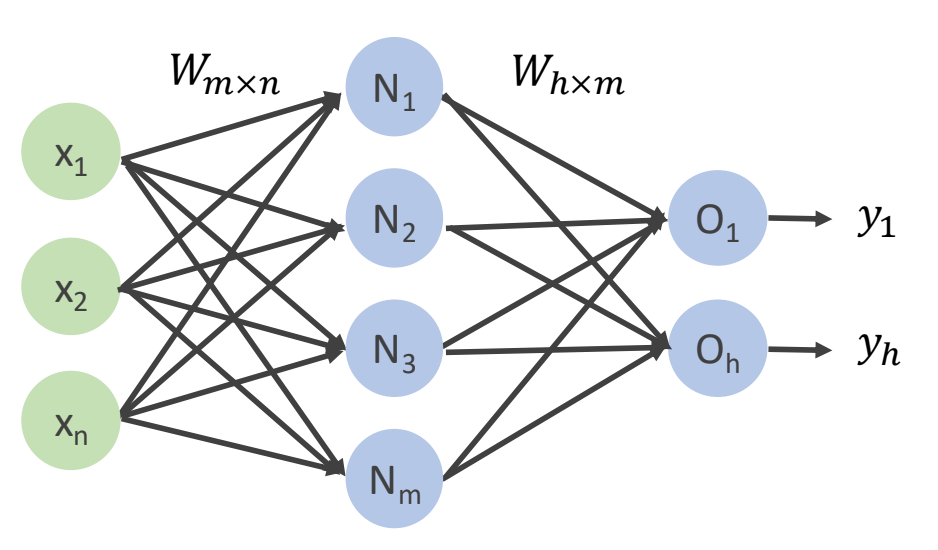

*   n: Number of neurons in the input layer
*   m: Number of neurons in the hidden layer
*   h: Number of neurons in the output layer
*   J: Size of the data set


The computation number of parameters, we use the next equation:

$$Weights= m(n+1)+h(m+1)$$

The computation of operarion we use:

$$Total\_Operation= J*Epochs(2\left(3mh+4h+2mn+3m\right)+3h)$$

And the time we use the time execution time of colab notebook. We use the same equations for each case.

| **N** | **M** | **H** | **Epochs** | **Dataset size** | **Time execution** | **Parameters** | **Learning rate** | **Total Operations** | **Precision** |
|:-----:|:-----:|:-----:|:----------:|:----------------:|:------------------:|----------------|:-----------------:|:--------------------:|:-------------:|
|  784  |  100  |   10  |    1000    |       60000      |     22 minutes     |      79510     |        0.5        |    19216800000000    |      9.8%     |
|  784  |   10  |   10  |    1000    |       60000      |      1 minute      |      7960      |        0.01       |     1926000000000    |     10.1%     |
|  784  |  800  |   10  |     400    |       10000      |      8 minutes     |     636010     |        0.1        |    10246720000000    |     10.5%     |
|  784  |  2000 |   10  |     100    |       10000      |      5 minutes     |     1590010    |        0.02       |     6404080000000    |     10.62%    |
|  784  |  2500 |   10  |     300    |       60000      |      1h 55 min     |     1987510    |        0.2        |    144091440000000   |      9.8%     |

As can be seen in the table, some parameters are varied to compare the accuracy of the model and the execution time, and the following can be concluded:

- Increasing the number of epochs in training does not necessarily guarantee maximum model accuracy. The improvement in the weights at each iteration is not the only determining factor. Other aspects, such as data quality, model architecture and hyperparameters, also have a significant influence on the final model performance.

- Given that a simple architecture with a single hidden layer is employed, it is important to recognize that the accuracy of the model may be limited, regardless of the number of neurons in that layer.

- The number of operations is closely linked to each parameter involved in the neural network architecture. In general, as the number of operations and the complexity of the network architecture configuration increases, the processing time also increases. However, it is important to note that this increase in complexity does not necessarily guarantee a better result. Therefore, it is critical to balance the complexity of the model with the need for accurate and efficient results.
- The number of parameters in a neural network of this architecture is directly related to the number of neurons in the hidden layer. Each neuron in the hidden layer is connected to all neurons in the input layer and the output layer, which implies an increase in the total number of parameters, which significantly influences the computation of operations and the model execution time during training.

